In [1]:
%matplotlib inline

In [5]:
from pandas_datareader import data

In [43]:
import pandas as pd

In [223]:
path = r'C:\Users\A0503096\Downloads\Logram-master\Logram-master\LogAbstractionOffline\final_es_output_3hour_edge.xlsx'
df = pd.read_excel(path)
type(df['timestamp'][0]) 
# df.set_index(df['timestamp'], inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,timestamp,cpu,jvm,index_total,index_time_in_millis,io_write,io_read,query_total,query_time_in_millis
0,2020-10-07 11:45:49,0,17978366432,2876951108,537192102,73257138,3184312,7684157,175710347
1,2020-10-07 11:46:19,0,18070641120,2876951323,537192140,73257223,3184312,7684159,175710347
2,2020-10-07 11:46:50,0,18204858848,2876951485,537192170,73257320,3184312,7684161,175710348
3,2020-10-07 11:47:21,0,18305522144,2876951647,537192199,73257397,3184312,7684163,175710349
4,2020-10-07 11:47:51,0,18406185440,2876951809,537192226,73257473,3184312,7684165,175710350


In [224]:

import datetime
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['jvm'] = df['jvm'].apply(lambda x: x/1e9)
df.head()
# df.set_index(df['timestamp'], inplace=True)
# df.drop(['timestamp'], axis=1, inplace=True)
df.head()

,timestamp,cpu,jvm,index_total,index_time_in_millis,io_write,io_read,query_total,query_time_in_millis
0,2020-10-07 11:45:49,0,17.978366,2876951108,537192102,73257138,3184312,7684157,175710347
1,2020-10-07 11:46:19,0,18.070641,2876951323,537192140,73257223,3184312,7684159,175710347
2,2020-10-07 11:46:50,0,18.204859,2876951485,537192170,73257320,3184312,7684161,175710348
3,2020-10-07 11:47:21,0,18.305522,2876951647,537192199,73257397,3184312,7684163,175710349
4,2020-10-07 11:47:51,0,18.406185,2876951809,537192226,73257473,3184312,7684165,175710350


In [225]:
df['io_write_rate'] = (df['io_write'] - df['io_write'].shift(1))/30
df['io_read_rate'] = (df['io_read'] - df['io_read'].shift(1))/30
df['latency'] = (df['query_time_in_millis'] - df['query_time_in_millis'].shift(1)) / (df['query_total'] - df['query_total'].shift(1))
df.head()

,timestamp,cpu,jvm,index_total,index_time_in_millis,io_write,io_read,query_total,query_time_in_millis,io_write_rate,io_read_rate,latency
0,2020-10-07 11:45:49,0,17.978366,2876951108,537192102,73257138,3184312,7684157,175710347,NaN,NaN,NaN
1,2020-10-07 11:46:19,0,18.070641,2876951323,537192140,73257223,3184312,7684159,175710347,2.833333,0.0,0.0
2,2020-10-07 11:46:50,0,18.204859,2876951485,537192170,73257320,3184312,7684161,175710348,3.233333,0.0,0.5
3,2020-10-07 11:47:21,0,18.305522,2876951647,537192199,73257397,3184312,7684163,175710349,2.566667,0.0,0.5
4,2020-10-07 11:47:51,0,18.406185,2876951809,537192226,73257473,3184312,7684165,175710350,2.533333,0.0,0.5


In [226]:
df['timestamp'][0].minute
df2 = df[['timestamp', 'cpu', 'jvm', 'io_write_rate', 'io_read_rate', 'latency']]
df2.set_index(df2['timestamp'], inplace=True)
df2.drop(['timestamp'], axis=1, inplace=True)
df2.head()

c:\users\a0503096\anaconda3\envs\test\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,cpu,jvm,io_write_rate,io_read_rate,latency
timestamp,,,,,
2020-10-07 11:45:49,0,17.978366,NaN,NaN,NaN
2020-10-07 11:46:19,0,18.070641,2.833333,0.0,0.0
2020-10-07 11:46:50,0,18.204859,3.233333,0.0,0.5
2020-10-07 11:47:21,0,18.305522,2.566667,0.0,0.5
2020-10-07 11:47:51,0,18.406185,2.533333,0.0,0.5


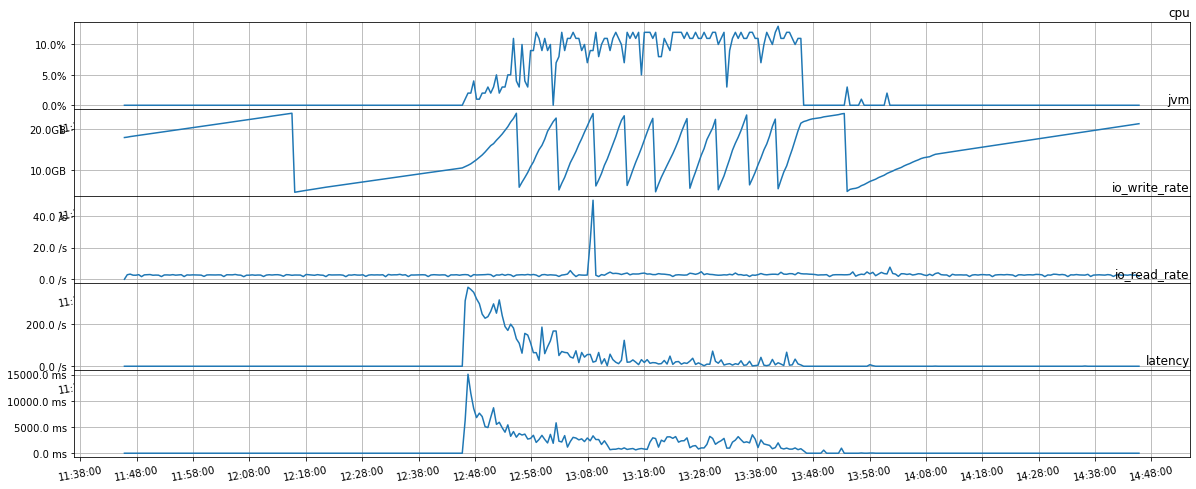

In [227]:
import numpy as np
# ax.xaxis.set_major_locator(dates.MonthLocator())
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.ticker as tic
import matplotlib.dates as dates
from matplotlib.dates import MinuteLocator, DateFormatter

# df['jvm'] = df['jvm'].apply(lambda x: x + 'GB')
columns = ['%', 'GB', ' /s', ' /s', ' ms']
df.fillna(0, inplace=True)
fig = plt.figure(figsize=(20, 8))
for i, value in enumerate(df2):
    temp = 510 + (i+1)
    ax = plt.subplot(temp)
    plt.plot(df['timestamp'], df[value])
    plt.subplots_adjust(hspace = .001)
    ax.xaxis.set_major_locator(MinuteLocator(interval=10))
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    ax.xaxis.set_tick_params(rotation=10)
    vals = ax.get_yticks()
    ax.set_yticklabels(['{}'.format(x) + columns[i] for x in vals])
    ax.xaxis.grid()
    ax.yaxis.grid()
#     ax.title.set_visible(False)
#     ax.title.set_text('First Plot')
    plt.title('{}'.format(value), loc='right')
    
    # plt.xticks([t for t in df['timestamp']], df['timestamp'], rotation=10)
    # ax = plt.gca()
#     plt.tight_layout()

plt.show()


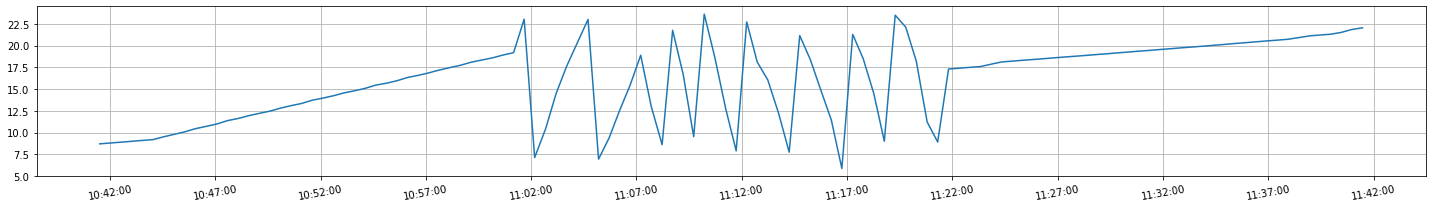

In [143]:
import numpy as np
# ax.xaxis.set_major_locator(dates.MonthLocator())
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker
import matplotlib.dates as dates
from matplotlib.dates import MinuteLocator, DateFormatter

# plt.figure()
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(df['timestamp'], df['jvm'])
ax.xaxis.set_major_locator(MinuteLocator(interval=5))
ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
ax.xaxis.set_tick_params(rotation=10)
ax.xaxis.grid()
ax.yaxis.grid()
# plt.xticks([t for t in df['timestamp']], df['timestamp'], rotation=10)
# ax = plt.gca()
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.ticker as tic


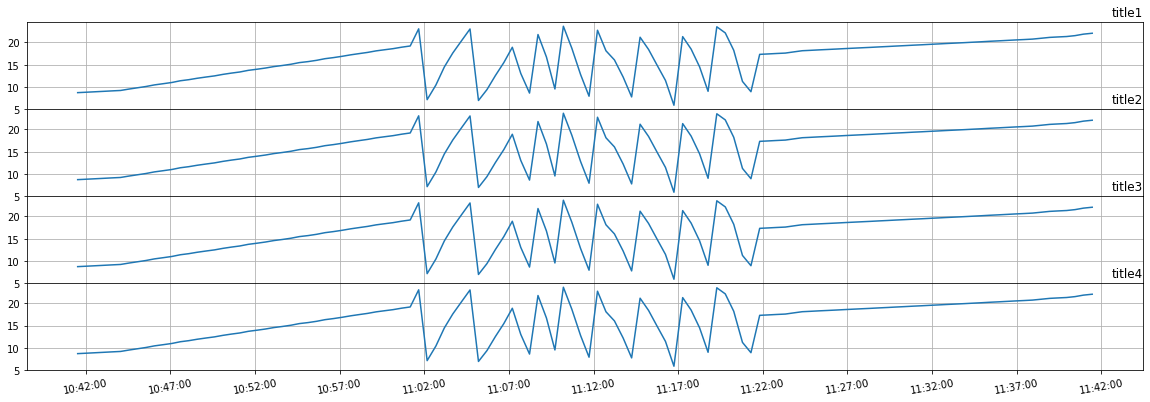

In [166]:
import matplotlib.ticker as tic

fig = plt.figure(figsize=(20, 8))

for i in range(1, 5):
    temp= 510 + i
    ax = plt.subplot(temp)
    plt.plot(df['timestamp'], df['jvm'])
    plt.subplots_adjust(hspace = .001)
    ax.xaxis.set_major_locator(MinuteLocator(interval=5))
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    ax.xaxis.set_tick_params(rotation=10)
    ax.xaxis.grid()
    ax.yaxis.grid()
#     ax.title.set_visible(False)
#     ax.title.set_text('First Plot')
    plt.title('title{}'.format(i), loc='right')
    # plt.xticks([t for t in df['timestamp']], df['timestamp'], rotation=10)
    # ax = plt.gca()
#     plt.tight_layout()

plt.show()

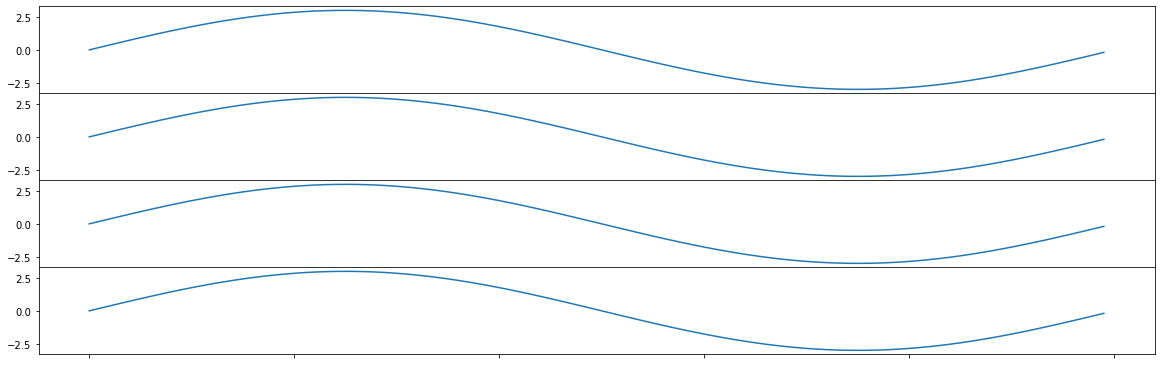

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tic

fig = plt.figure(figsize=(20, 8))

x = np.arange(100)
y = 3.*np.sin(x*2.*np.pi/100.)

for i in range(1, 5):
    temp = 510 + i
    ax = plt.subplot(temp)
    plt.plot(x,y)
    plt.subplots_adjust(hspace = .001)
    temp = tic.MaxNLocator(3)
    ax.yaxis.set_major_locator(temp)
    ax.set_xticklabels(())
    ax.title.set_visible(False)

plt.show()

In [203]:

4587191992 / 1e9

4.587191992